# Milestone 1

Mark Hill, Kyle Honegger, & Joseph Reilly

In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import time
from imdb import IMDb
import tmdbsimple as tmdb

ImportError: No module named imdb

In [3]:
#API code to access the genre and movie poster path of Shawshank Redemption
#code adapted from https://www.johannesbader.ch/2013/11/tutorial-download-posters-with-the-movie-database-api-in-python/
import requests
CONFIG_PATTERN = 'http://api.themoviedb.org/3/configuration?api_key={key}'
KEY = '2b2fbe62128703d589c7c7ce18847e91'

url = CONFIG_PATTERN.format(key=KEY)
r = requests.get(url)
config = r.json()

#get the genre for Shawshank Redemption
INFO = 'https://api.themoviedb.org/3/movie/{imdbid}?api_key={key}' 
r = requests.get(INFO.format(key=KEY,imdbid='tt0111161'))
api_response = r.json()
genres = api_response['genres']
for i in range(len(genres)):
    genres[i] = genres[i]['name']
print genres

[u'Drama', u'Crime']


In [4]:
#get the poster paths for all Shawshank Redemption posters
#code adapted from https://www.johannesbader.ch/2013/11/tutorial-download-posters-with-the-movie-database-api-in-python/
IMG_PATTERN = 'http://api.themoviedb.org/3/movie/{imdbid}/images?api_key={key}' 
r = requests.get(IMG_PATTERN.format(key=KEY,imdbid='tt0111161'))
api_response = r.json()

base_url = config['images']['base_url']
max_size = 'original'

posters = api_response['posters']
poster_urls = []
for poster in posters:
    rel_path = poster['file_path']
    url = "{0}{1}{2}".format(base_url, max_size, rel_path)
    poster_urls.append(url)
    
print poster_urls

['http://image.tmdb.org/t/p/original/9O7gLzmreU0nGkIB6K3BsJbzvNv.jpg', 'http://image.tmdb.org/t/p/original/5cIUvCJQ2aNPXRCmXiOIuJJxIki.jpg', 'http://image.tmdb.org/t/p/original/adAqmzscm4xSYDHw81xiwiLwbhU.jpg', 'http://image.tmdb.org/t/p/original/eQZx8NMO70dFHfgG5NQpJAI7qEh.jpg', 'http://image.tmdb.org/t/p/original/gD1INoVS8haUutzabwUV7Io6akm.jpg', 'http://image.tmdb.org/t/p/original/4P2ffljT2w5Kjvxj9S0wOoRlm0E.jpg', 'http://image.tmdb.org/t/p/original/fbYYoWxLfEGyHqKNtHcmmVbAtpz.jpg', 'http://image.tmdb.org/t/p/original/zGINvGjdlO6TJRu9wESQvWlOKVT.jpg', 'http://image.tmdb.org/t/p/original/kJhv5sdWucRp4YEcLbQpT75qan1.jpg', 'http://image.tmdb.org/t/p/original/seWYZw81LG4pqKptJ0wjHNR5aHv.jpg', 'http://image.tmdb.org/t/p/original/7DxYWkioSebwGQKL1DZHcMzrJBV.jpg', 'http://image.tmdb.org/t/p/original/5CbDQfraiQbjcjH797ookjp1XeH.jpg', 'http://image.tmdb.org/t/p/original/tWzOxgdkYyuIICOG3kZLN4YHzt6.jpg', 'http://image.tmdb.org/t/p/original/umX3lBhHoTV7Lsci140Yr8VpXyN.jpg', 'http://image.tmdb.

In [6]:
#Genre for this movie listed by TMDb and IMDb

#TMDb genre info
print "TMDb genre:", genres

#IMDb genre info
ia = IMDb()
shawshank = ia.get_movie('0111161')
print "IMDB genre:", shawshank['genre']

TMDb genre: [u'Drama', u'Crime']
IMDB genre: [u'Crime', u'Drama']


In [7]:
#A list of the 10 most popular movies of 2016 from TMDb and their genre obtained via the API
INFO = 'https://api.themoviedb.org/3/discover/movie?api_key={key}&primary_release_year=2016&sort_by=popularity.desc&page=1' 
r = requests.get(INFO.format(key=KEY))
api_response = r.json()

titles = []
for i in range(10):
    titles.append(api_response['results'][i]['original_title'])
genres = []
for i in range(10):
    genres.append(api_response['results'][i]['genre_ids'])
    
#get genre movie list from TMDb (to convert ID to name of genre)
LIST = 'https://api.themoviedb.org/3/genre/movie/list?api_key={key}&language=en-US'
r = requests.get(LIST.format(key=KEY))
genre_list = r.json()

#make it a dictionary
dict = {}
for i in range(len(genre_list['genres'])):
    dict[genre_list['genres'][i]['id']] = genre_list['genres'][i]['name']

#convert genre IDs to names
for i in range(len(genres)):
    for j in range(len(genres[i])):
        genres[i][j] = dict[genres[i][j]]

#print 2016 movie info
dat = {'titles': titles, 'genres': genres}
df = pd.DataFrame(data=dat)
df

,genres,titles
0,"[Animation, Comedy, Drama, Family, Music]",Sing
1,"[Adventure, Action, Fantasy]",Fantastic Beasts and Where to Find Them
2,"[Adventure, Animation, Comedy, Family]",Finding Dory
3,"[Action, Adventure, Comedy, Romance]",Deadpool
4,"[Action, Drama, Science Fiction, War]",Rogue One: A Star Wars Story
5,"[Action, Adventure, Fantasy, Science Fiction]",Doctor Strange
6,"[Drama, Science Fiction]",Arrival
7,"[Action, Science Fiction]",Captain America: Civil War
8,"[Action, Horror]",Underworld: Blood Wars
9,[Drama],Lion


**Comments on what challenges you see for predicting movie genre based on the data you have, and how to address them.**

Right now the most obvious challenge is deciding what genres to use and how many to use when designing the test and training sets for classifying a movie. As can been seen from above, the 10 most popular movies of 2016 all have more than 1 genre, and most have more than 2.

Different databases might have different genres listed for a movie. Lists of genres from different sources can be in different orders and might need to be sorted first before further pairwise analysis is possible (computationally expensive). Community-based databases might contain errors or subjective differences in people's opinions of genre. Some genres are much more common than others (unbalanced data).

In [8]:
#Code to generate the movie genre pairs and a suitable visualization of the result

#download 1000 most popular movies and store genre id + title
titles = []
genres = []
for i in (range(50)):
    INFO = 'https://api.themoviedb.org/3/discover/movie?api_key={key}&sort_by=popularity.desc&page={page}' 
    r = requests.get(INFO.format(key=KEY, page = i+1))
    api_response = r.json()
    time.sleep(1)
    for j in range(20):
        titles.append(api_response['results'][j]['original_title'])
        genres.append(api_response['results'][j]['genre_ids'])
        
#convert genre IDs to names
for i in range(len(genres)):
    for j in range(len(genres[i])):
        genres[i][j] = dict[genres[i][j]]

In [9]:
from itertools import combinations

#get genre pairs for every movie
genre_pairs = []
for i in range(len(genres)):
    genres[i].sort()
    genre_pairs.append(list(combinations(genres[i], 2)))

In [10]:
#just store strings of every combination not binned by movie
pairs_strings = []
for i in range(len(genre_pairs)):
    for j in range(len(genre_pairs[i])):
        pairs_strings.append('-'.join(genre_pairs[i][j]))

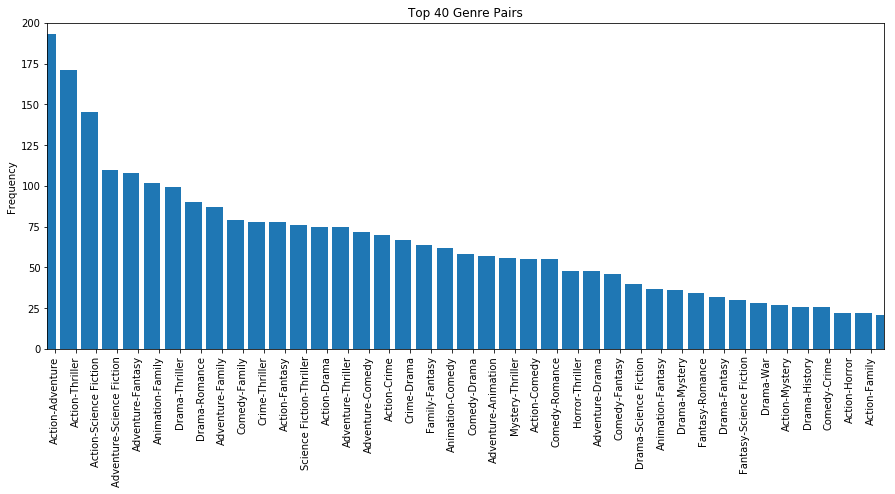

In [11]:
#the histogram of the data
#code adapted from http://stackoverflow.com/questions/35596128/how-to-generate-a-word-frequency-histogram-where-bars-are-ordered-according-to

import csv
from collections import Counter

counts = Counter(pairs_strings)
labels, values = zip(*counts.items())

# sort values in descending order
indSort = np.argsort(values)[::-1]

# rearrange data
labels = np.array(labels)[indSort]
values = np.array(values)[indSort]

indexes = np.arange(len(labels))

bar_width = 0.35

plt.figure(figsize=(15,6))
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels, rotation = 90)
plt.title("Top 40 Genre Pairs")
plt.ylabel("Frequency")
plt.axis([0, 40, 0, 200])

plt.show()

I picked 40 pairs kind of arbitrarily but after that point the pairs are present in less than 2.5% of our films.

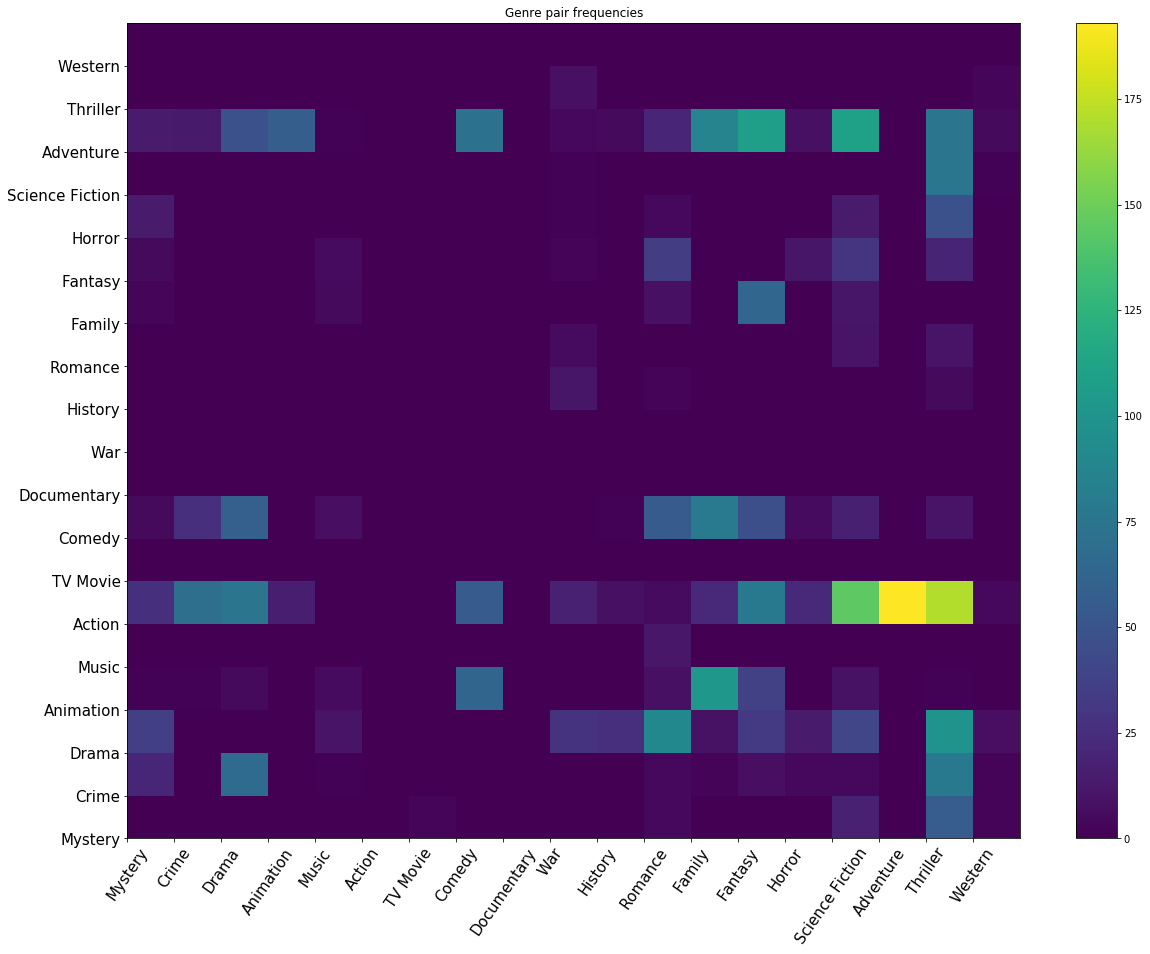

In [12]:
# Heatmap of genre pairs

# First make a set with all the genre names
all_genres = set()

for i in genres:
    all_genres = all_genres | set(i) #keep only unique

    
# Now, make a dictionary with genres serving as keys
genlut = {} # This will serve as a hash table of sorts, for the freq matrix
ct = 0
for i in all_genres:
    genlut[i] = ct
    ct += 1
    
    
# Fill in the frequency matrix by incrementing counts
genx = np.zeros((len(genlut), len(genlut)))
for i in genres:
    for j in range(len(i)):
        for jj in range((j+1),len(i)):
            genx[genlut[i[j]], genlut[i[jj]]] += 1

            
# Sort keys so the labels are the correct order
keyls = genlut.keys()
idxls = genlut.values()
sorted_gens = [keyls[x] for x in np.argsort(idxls)]

# Plot heatmap w/colorbar
plt.figure(figsize=(20,15))
plt.pcolor(genx)
plt.tick_params(labelsize=15)
plt.xticks(range(len(sorted_gens)), sorted_gens, rotation=55, ha='center')
plt.yticks(range(len(sorted_gens)), sorted_gens)
plt.colorbar()
plt.title('Genre pair frequencies')

**Additional visualization sketches and EDA with a focus on movie genres**

Potential visualizations: IMBd and/or TMDb Rating versus genre (bar chart), genres by country (potentially color code a map), correlations of highly rated or popular actors and their common genres.

In [13]:
# store API key for tmdb
tmdb.API_KEY = '2b2fbe62128703d589c7c7ce18847e91'

In [14]:
# use Discover wrapper to find movies released in 2015 with at least 500 votes, 
# store in results
discover = tmdb.Discover()
results = discover.movie(year='2015', vote_count_gte = '500')

In [15]:
# show the data that can be collected from Discover() wrapper for each movie
discover.results[1]

{u'adult': False,
 u'backdrop_path': u'/phszHPFVhPHhMZgo0fWTKBDQsJA.jpg',
 u'genre_ids': [28, 12, 878, 53],
 u'id': 76341,
 u'original_language': u'en',
 u'original_title': u'Mad Max: Fury Road',
 u'overview': u"An apocalyptic story set in the furthest reaches of our planet, in a stark desert landscape where humanity is broken, and most everyone is crazed fighting for the necessities of life. Within this world exist two rebels on the run who just might be able to restore order. There's Max, a man of action and a man of few words, who seeks peace of mind following the loss of his wife and child in the aftermath of the chaos. And Furiosa, a woman of action and a woman who believes her path to survival may be achieved if she can make it across the desert back to her childhood homeland.",
 u'popularity': 27.899866,
 u'poster_path': u'/kqjL17yufvn9OVLyXYpvtyrFfak.jpg',
 u'release_date': u'2015-05-13',
 u'title': u'Mad Max: Fury Road',
 u'video': False,
 u'vote_average': 7.2,
 u'vote_count':

In [16]:
# get total number of pages that need to be iterated through to collect id info for movies 
all_pages = results['total_pages']

In [17]:
# collect the ids of the movies from Discover() to so they can be used to collect specific data
# beyond the basic data provided by Discover()
ids_EDA = []
for i in range(all_pages):
    temp = discover.movie(year='2015', vote_count_gte = '500', page = i+1)
    for s in discover.results:
        ids_EDA.append(s['id'])

# check how many movies fit the criteria in Discover()
len(ids_EDA)

199

In [18]:
# use the Movies() wrapper because this provides a lot more details about each movie
# show the basic details that may be of interest from the Movies wrapper
meta_data = tmdb.Movies(ids_EDA[0]).info()
meta_data

{u'adult': False,
 u'backdrop_path': u'/dkMD5qlogeRMiEixC4YNPUvax2T.jpg',
 u'belongs_to_collection': {u'backdrop_path': u'/pJjIH9QN0OkHFV9eue6XfRVnPkr.jpg',
  u'id': 328,
  u'name': u'Jurassic Park Collection',
  u'poster_path': u'/qIm2nHXLpBBdMxi8dvfrnDkBUDh.jpg'},
 u'budget': 150000000,
 u'genres': [{u'id': 28, u'name': u'Action'},
  {u'id': 12, u'name': u'Adventure'},
  {u'id': 878, u'name': u'Science Fiction'},
  {u'id': 53, u'name': u'Thriller'}],
 u'homepage': u'http://www.jurassicworld.com/',
 u'id': 135397,
 u'imdb_id': u'tt0369610',
 u'original_language': u'en',
 u'original_title': u'Jurassic World',
 u'overview': u'Twenty-two years after the events of Jurassic Park, Isla Nublar now features a fully functioning dinosaur theme park, Jurassic World, as originally envisioned by John Hammond.',
 u'popularity': 49.574254,
 u'poster_path': u'/jjBgi2r5cRt36xF6iNUEhzscEcb.jpg',
 u'production_companies': [{u'id': 13, u'name': u'Universal Studios'},
  {u'id': 56, u'name': u'Amblin Enter

In [19]:
# print some specific details that may be of interest to us
print meta_data['title'],'\n',meta_data['genres'],'\n', meta_data['budget'],'\n',meta_data['tagline']
print meta_data['runtime'],'\n',meta_data['revenue'],'\n', meta_data['vote_average']

Jurassic World 
[{u'id': 28, u'name': u'Action'}, {u'id': 12, u'name': u'Adventure'}, {u'id': 878, u'name': u'Science Fiction'}, {u'id': 53, u'name': u'Thriller'}] 
150000000 
The park is open.
124 
1513528810 
6.5


In [20]:
# get the listed genres for each of the 199 movies found above and the profit for each one
# of those movies
genre_eda = []
profit_eda = []
for i in range(len(ids_EDA)):
    temp = tmdb.Movies(ids_EDA[i]).info()
    genre_eda.append(temp['genres'])
    profit_eda.append(temp['revenue'] - temp['budget'])
    time.sleep(0.25)

In [21]:
# pull out the individual genres for each movie
genre_lists = []
for i in range(len(genre_eda)):
    temp = []
    for j in range(len(genre_eda[i])):
        temp.append(genre_eda[i][j]['name'])
    genre_lists.append(temp)

In [22]:
# if a genre is assigned to a given movie, assign that genre the profit from that movie
action_prof = []
advent_prof = []
anima_prof = []
com_prof = []
crime_prof = []
drama_prof = []
family_prof = []
fant_prof = []
hist_prof = []
horr_prof = []
music_prof = []
myst_prof = []
rom_prof = []
scifi_prof = []
thrill_prof = []
war_prof = []
west_prof = []
for i in range(len(genre_lists)):
    temp = genre_lists[i]
    if 'Action' in temp:
        action_prof.append(profit_eda[i])
    if 'Adventure' in temp:
        advent_prof.append(profit_eda[i])
    if 'Animation' in temp:
        anima_prof.append(profit_eda[i])
    if 'Comedy' in temp:
        com_prof.append(profit_eda[i])
    if 'Crime' in temp:
        crime_prof.append(profit_eda[i])
    if 'Drama' in temp:
        drama_prof.append(profit_eda[i])
    if 'Family' in temp:
        family_prof.append(profit_eda[i])
    if 'Fantasy' in temp:
        fant_prof.append(profit_eda[i])
    if 'History' in temp:
        hist_prof.append(profit_eda[i])
    if 'Horror' in temp:
        horr_prof.append(profit_eda[i])
    if 'Music' in temp:
        music_prof.append(profit_eda[i])
    if 'Mystery' in temp:
        myst_prof.append(profit_eda[i])
    if 'Romance' in temp:
        rom_prof.append(profit_eda[i])
    if 'Science Fiction' in temp:
        scifi_prof.append(profit_eda[i])
    if 'Thriller' in temp:
        thrill_prof.append(profit_eda[i])
    if 'War' in temp:
        war_prof.append(profit_eda[i])
    if 'Western' in temp:
        west_prof.append(profit_eda[i])
        
# store in list to find the means for each list of profits for each genre
profits = [action_prof, advent_prof, anima_prof, com_prof, crime_prof, drama_prof,
          family_prof, fant_prof, hist_prof, horr_prof, music_prof, myst_prof, rom_prof,
          scifi_prof, thrill_prof, war_prof, west_prof]

In [23]:
# find mean profits for each genre
genre_profs = []
for i in range(len(profits)):
    prof = profits[i]
    genre_profs.append(np.mean(prof))

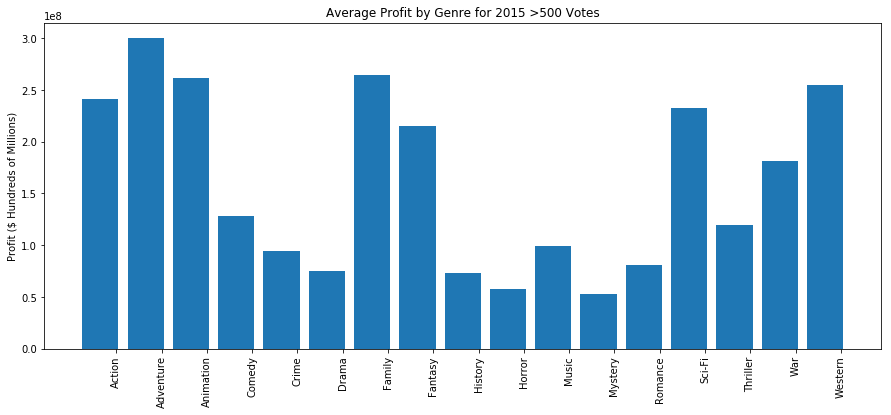

In [24]:
# create bar plot of profit by genre for 2015 >500 vote movies
labels = ['Action', 'Adventure','Animation','Comedy','Crime','Drama','Family','Fantasy',
          'History','Horror','Music','Mystery','Romance','Sci-Fi','Thriller','War','Western']
labels = np.array(labels)
values = np.array(genre_profs)

indexes = np.arange(len(labels))

bar_width = 0.35

plt.figure(figsize=(15,6))
plt.bar(indexes, values)
plt.xticks(indexes + bar_width, labels, rotation = 90)
plt.title("Average Profit by Genre for 2015 >500 Votes")
plt.ylabel("Profit ($ Hundreds of Millions)")
#plt.axis([0, 40, 0, 200])

plt.show()

In [25]:
# can also use the movies wrapper to get movies that are similar to a given movie
# NOTE: you can also do this to get recommendations
similar = tmdb.Movies(str(ids_EDA[0])+'/similar')
similar = similar.info()['results']

In [26]:
# recover info about movies that are deemed similar to Jurassic World
for s in similar:
    print s['title'], s['id'], s['genre_ids']

Kong: Skull Island 293167 [878, 28, 12, 14]
Cloverfield 7191 [28, 53, 878]
Godzilla 124905 [28, 878, 53]
The Beast from 20,000 Fathoms 35073 [12, 27, 878]
The Expendables 27578 [28, 53]
Jurassic Park 329 [12, 878]
The Shallows 332567 [27, 18, 53]
King Kong 254 [12, 18, 28]
The Mist 5876 [878, 27, 53]
Godzilla 1678 [53, 27, 878]
The Food of the Gods 42245 [27, 878]
Dolores Claiborne 11929 [9648, 18, 53, 80]
Rollercoaster 10670 [28, 53]
2-Headed Shark Attack 86703 [27, 28, 53, 878]
Tarantula 9077 [27, 878, 53]
Snakes on a Plane 326 [28, 80, 27, 53]
The Edge 9433 [12, 28, 18, 53]
The Third Man 1092 [53, 9648]
Frozen 44363 [53]
Mothra 39410 [14, 878, 53]


In [27]:
# can also use the movies wrapper to get movies that are similar to a given movie
# NOTE: you can also do this to get recommendations
reviews = tmdb.Movies(str(ids_EDA[0])+'/reviews')
reviews.info()['results'][0]['content']

u"I was a huge fan of the original 3 movies, they were out when I was younger, and I grew up loving dinosaurs because of them. This movie was awesome, and I think it can stand as a testimonial piece towards the capabilities that Christopher Pratt has. He nailed it. The graphics were awesome, the supporting cast did great and the t rex saved the child in me. 10\\5 stars, four thumbs up, and I hope that star wars episode VII doesn't disappoint,"

**A list of questions you could answer with this and related data. Get creative here!**

Clearly there is a massive amount of data that can be collected using TMDb, and the examples provided above don't really scratch the surface. Images, cast, alternative titles, translations, and much more can be gathered using TMDb. 

Using this available data one can imagine creating many visualizations and asking a multidue of questions in an attempt to differentiate genres based on different metadata statistics. What genres are associated with larger budgets? Are certain genres more likely to make a profit? Have a larger cast? Be translated into a certain language or have an original language other than English? Have longer or shorter reviews? Have higher or lower ratings? Have certain keywords? Have certain words in their tagline?

Something that could be interesting is to perform topic modeling, or some other type of analysis, on the text data (tagline, overview, reviews) that is available. Perhaps the overviews factorize into a small number of topics that are highly correlated with genre. Or by looking at the reviews, maybe we could perform analyses to guess the gender of each reviewer and then see if certin genres are more likely to have more female or male reviewers. Additionally, we could look at the tag lines and try to find if certain types of taglines (maybe certain words that convey optimism or love or fear) are associated with certain genres.

Another possibility is to collect character names for each movie and see if certain types of character names are associated with a particular genre. You could imagine that the names of characters in a family movie are pretty different from those in a history movie or western.

![alt text](image1.jpg "EDA Visualization 1")
![alt text](image2.jpg "EDA Visualization 2")

In the first image above you could imagine using word counts from text data and using some sort of Bayesian analysis to predict movie genre like we did in midterm 1. The second image could be a way of showing what genres take up larger portions of certain categories. In this case, whether or not they belong to a collection of movies.